## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks

## Importing Dataset

In [2]:
stock_df = pd.read_csv("Data/stock_sentiment.csv")

In [3]:
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [5]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [6]:
stock_df['Sentiment'].nunique()

2

In [7]:
stock_df['Sentiment'].unique()

array([1, 0], dtype=int64)

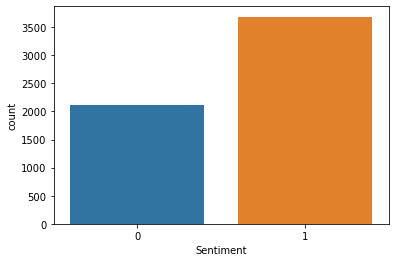

In [8]:
sns.countplot(stock_df['Sentiment'])

In [9]:
stock_df['Sentiment'].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

## Data Cleaning

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punc(text):
    text_punc_list = [char for char in text if char not in string.punctuation]
    text_clean = "".join(text_punc_list)
    return text_clean

In [12]:
stock_df['Text_clean_punc'] = stock_df['Text'].apply(remove_punc)

In [13]:
stock_df

,Text,Sentiment,Text_clean_punc
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [14]:
nltk.download("stopwords")
stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\SHREENATH
[nltk_data]     BHARADWAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

In [16]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):   #converts text in tokens of words
        if(token not in stop_words and len(token)>2):
            result.append(token)
    return result

In [17]:
stock_df['Text_preprocessed'] = stock_df['Text_clean_punc'].apply(preprocess)

In [18]:
stock_df

,Text,Sentiment,Text_clean_punc,Text_preprocessed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


## Plot WordCloud

In [19]:
stock_df['Text_clean'] = stock_df['Text_preprocessed'].apply(lambda x: " ".join(x))

In [20]:
stock_df

,Text,Sentiment,Text_clean_punc,Text_preprocessed,Text_clean
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


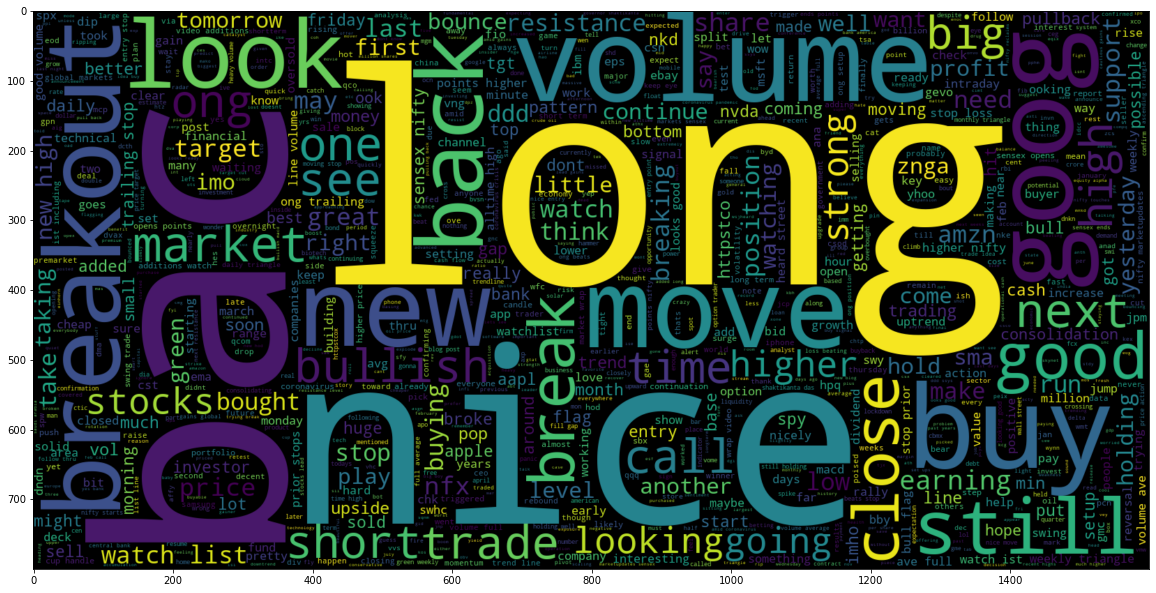

In [21]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text_clean']))
plt.imshow(wc, interpolation='bilinear')

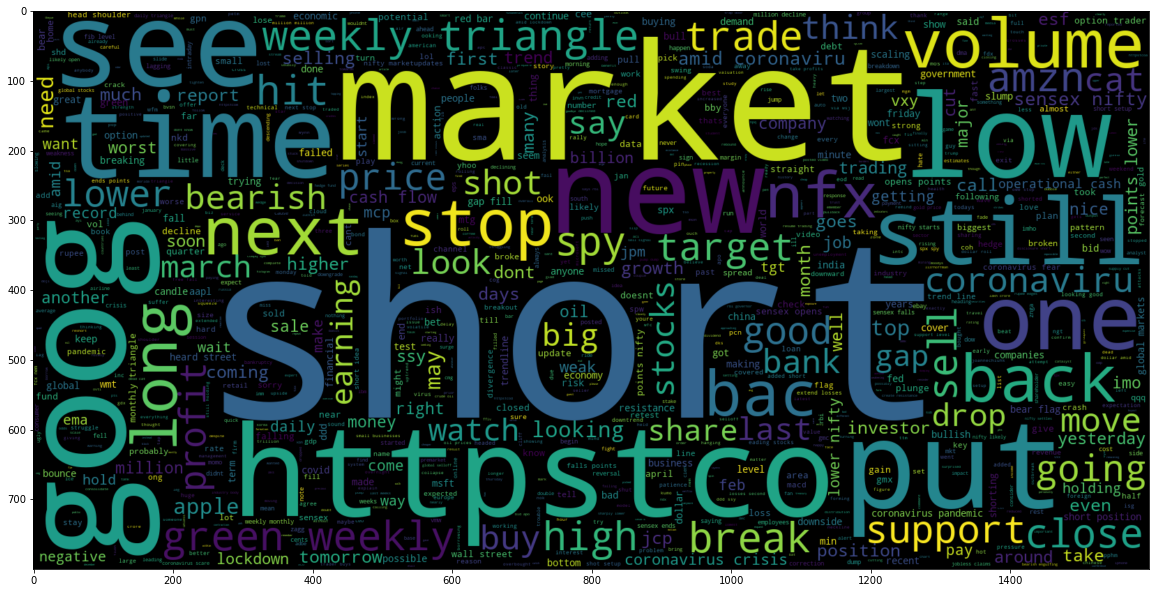

In [22]:
# plot the word cloud for text with negative sentiment
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text_clean']))
plt.imshow(wc, interpolation='bilinear')

## Visualize Cleaned Datasets

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SHREENATH
[nltk_data]     BHARADWAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# word_tokenize is used to break up a string into words
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = 0
for doc in stock_df['Text_clean']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [25]:
tweets_length = [len(nltk.word_tokenize(doc)) for doc in stock_df['Text_clean']]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

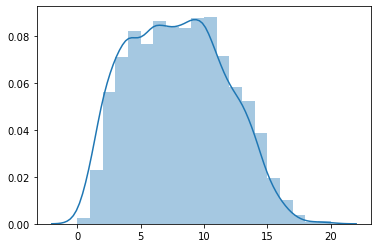

In [26]:
# Plot the distribution for the number of words in a text
sns.distplot(tweets_length, bins = 20)

In [27]:
def mean_value(df_col):
    tot_words = 0
    for text in df_col:
        tot_words+=len(text.split(" "))
    return tot_words//len(df_col)

In [28]:
mean_len = mean_value(stock_df['Text_clean'])
print("The mean length of the text is :", mean_len)

The mean length of the text is : 7


## Tokenizing and Padding

In [29]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['Text_preprocessed']:
    for j in i:
        list_of_words.append(j)
print(len(list_of_words))

45099


In [30]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [31]:
# split the data into test and train 
X = stock_df['Text_preprocessed']
y = stock_df['Sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [32]:
X_train.shape

(5211,)

In [33]:
X_test.shape

(580,)

In [34]:
X_train

2580        [cliff, head, shoulder, still, thinks, right]
3545                  [small, weekly, put, position, nfx]
2930    [nkd, well, moving, averages, look, som, eprof...
3365                                  [another, leg, ish]
5654    [sensex, surges, points, nifty, near, amid, wi...
                              ...                        
599                     [weekly, triangle, mhnet, profit]
5695    [gold, futures, rise, hover, near, amid, coron...
1361    [anybody, else, hearing, one, large, credit, c...
1547      [green, weekly, triangle, pbyopen, sell, short]
4959    [weeklybarely, hanging, onto, double, support,...
Name: Text_preprocessed, Length: 5211, dtype: object

In [35]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [36]:
train_sequences

[[1543, 386, 774, 13, 1287, 88],
 [135, 28, 160, 52, 38],
 [132, 66, 175, 1874, 77, 3619, 3620, 133, 7, 200, 1116],
 [83, 562, 292],
 [25, 1117, 46, 29, 161, 59, 1544, 3621, 357, 512, 3622, 3623],
 [3624, 57, 98, 93],
 [3625, 1545, 2472, 1118, 3626, 3627, 3628],
 [854, 10, 192, 293],
 [1288, 1119, 3629, 3630, 3631, 33],
 [153, 563, 162, 1546, 1875, 3632, 3, 127, 209, 249, 3633, 88, 250],
 [1289, 163, 17, 115, 2473],
 [775, 60, 481, 513, 3634, 514, 132, 1547],
 [294, 3, 210, 39, 115, 136, 2, 1548],
 [231, 69, 608, 641, 61, 453, 164, 163, 454],
 [513, 3635, 95, 165, 974, 119, 1549, 387, 35, 146],
 [2474, 154, 57, 515, 1876, 3636, 2475, 609, 855, 1290],
 [2476, 516, 141, 1291, 32, 103, 43, 134, 564, 45],
 [703, 565, 1292, 75, 1877, 224, 1878, 1550, 279],
 [202,
  2477,
  3637,
  81,
  856,
  200,
  104,
  128,
  3638,
  3639,
  3640,
  517,
  857,
  1879,
  3641,
  3642,
  3643],
 [111, 431, 2478, 36, 335, 1880, 15, 1881, 47],
 [280, 3644, 642, 27, 776, 89, 3645, 168, 3646, 3647],
 [324, 

In [37]:
test_sequences

[[255, 1, 156, 441, 38, 3610, 16, 466, 7059, 4, 156, 118, 14],
 [207, 30, 417, 443, 1216],
 [3592, 60, 66, 34, 1399, 3168, 3168, 2957, 2145, 314],
 [302, 164, 656, 318, 61, 302, 31, 162, 11, 283, 556, 372],
 [712, 1228, 3349, 93, 54, 726],
 [53, 2341],
 [2730, 2731, 384, 478, 671],
 [1049, 4977, 126, 489, 287, 176, 65, 938, 179, 45, 820, 45],
 [1, 1920],
 [207, 245, 276],
 [535, 167, 10],
 [223, 4111, 15, 267, 6337, 1081, 3385, 1977, 110, 1002],
 [111, 278, 556, 278, 1179, 2021, 1846, 358, 3548],
 [399, 157, 12, 1, 67, 98, 46, 21],
 [225, 23],
 [752, 27, 484, 1196, 2299, 796, 54, 112, 489, 225, 1104, 634, 68, 270],
 [68, 13, 433, 411],
 [623, 2144, 103, 2314, 2148, 237, 1316, 118],
 [7519, 122, 1478, 622, 7, 1000, 724, 7108, 724, 51],
 [214, 113, 213, 2619, 199, 455, 6448, 12, 1004, 2990],
 [4930, 226, 2494, 5834],
 [1344, 133, 510],
 [53, 41],
 [7, 20, 87, 355, 35, 1379, 5237, 42],
 [206, 499, 2829, 405, 75, 35, 692, 1307, 381, 19],
 [679, 4, 165, 6128, 567, 1068, 165, 582],
 [18, 504

In [38]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 3545    [small, weekly, put, position, nfx]
Name: Text_preprocessed, dtype: object 
 is:  [135, 28, 160, 52, 38]


In [39]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen = 15, padding = 'post', truncating='post')

In [40]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [1543  386  774   13 1287   88    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [135  28 160  52  38   0   0   0   0   0   0   0   0   0   0]
The padded encoding for document: 3  is: [ 132   66  175 1874   77 3619 3620  133    7  200 1116    0    0    0
    0]


In [41]:
# Convert the data to categorical 2D representation
num_classes = y_train.nunique()
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [42]:
y_train_cat.shape

(5211, 2)

In [43]:
y_test_cat.shape

(580, 2)

In [44]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Deep Neural Network To Perform Sentiment Analysis

In [45]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [46]:
early_stopping=callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=1, verbose=0, mode='max')

filepath="model/sentiment_model.h5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [early_stopping,checkpoint]

In [47]:
# train the model
model.fit(padded_train, y_train_cat,
          batch_size = 32,
          validation_data = (padded_test, y_test_cat),
          epochs = 2,
          callbacks=callbacks_list)

Epoch 1/2
163/163 [==============================] - ETA: 0s - loss: 0.5725 - acc: 0.7116
Epoch 00001: val_acc improved from -inf to 0.73276, saving model to model\sentiment_model.h5
163/163 [==============================] - 19s 114ms/step - loss: 0.5725 - acc: 0.7116 - val_loss: 0.5509 - val_acc: 0.7328
Epoch 2/2
163/163 [==============================] - ETA: 0s - loss: 0.3109 - acc: 0.8797
Epoch 00002: val_acc improved from 0.73276 to 0.79828, saving model to model\sentiment_model.h5
163/163 [==============================] - 20s 120ms/step - loss: 0.3109 - acc: 0.8797 - val_loss: 0.5525 - val_acc: 0.7983


In [48]:
# make prediction
pred = model.predict(padded_test)

In [49]:
# make prediction
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [50]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [51]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7982758620689655

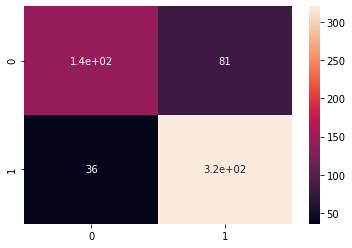

In [52]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)